In [1]:
#importing necessary libaries
try:
    import nltk
    from nltk.tokenize import sent_tokenize, word_tokenize
    from nltk.corpus import stopwords
    print('library imports successful')
except:
    print('Couldnt find libraries... importing')
    !pip install nltk
    nltk.download('tokenize')
    nltk.download('corpus')

library imports successful


In [2]:
#reading data from our file
data = ''
with open('ride_the_pig.txt', 'r', encoding='utf-8') as f:
    data = f.read()
    print('Raw Speech Data Read Successfully')

Raw Speech Data Read Successfully


In [3]:
#tokenizing data into words and sentences
data_words = word_tokenize(data)
data_sent  = sent_tokenize(data)

In [4]:
#removing stop words
stop_words      = set(stopwords.words('english'))
data_words_filt = [w for w in data_words if w not in stop_words]

In [5]:
#getting the parts of speech of the filtered data
try:
    from nltk.tokenize import PunktSentenceTokenizer
    print('Punkt imported successfully')
except:
    nltk.download('tokenize')

Punkt imported successfully


In [6]:
#pos tags
pos_tags = nltk.pos_tag(data_words_filt)

#named entity representaion
namedEntity = nltk.ne_chunk(pos_tags,binary=True)

In [7]:
#putting all nouns, proper nouns and verbs into lists
NOUNS   = [w[0] for w in pos_tags if (w[1] =='NN') and (len(w[0]))>1]
PNOUNS  = [w[0] for w in pos_tags if (w[1] =='NNP') and (len(w[0]))>1]
VERBS   = [w[0] for w in pos_tags if (w[1] =='VB') and (len(w[0]))>1]

In [8]:
#getting all verbs and pro8per nouns
try:
    from nltk.stem.wordnet import WordNetLemmatizer
    print('Wordnet ready!')
except:
    nltk.download('stem')

Wordnet ready!


In [9]:
#lemmatizing all our nouns
lemmatizer = WordNetLemmatizer()

lemmatized = []
for noun in NOUNS:
    lemmatized.append(lemmatizer.lemmatize(noun))

In [10]:
#getting the top most common 10 nouns
from nltk.probability import FreqDist
fdist_nouns  = FreqDist(NOUNS)
fdist_pnouns = FreqDist(PNOUNS)
fdist_verbs  = FreqDist(VERBS)


top_verbs   = fdist_verbs.most_common(20)
top_nouns   = fdist_nouns.most_common(10)
top_pnouns  = fdist_pnouns.most_common(10)

In [11]:
#plotting data
try:
    import matplotlib.pyplot as plt
    print('Matlib ready')
except:
    !pip install matplotlib

Matlib ready


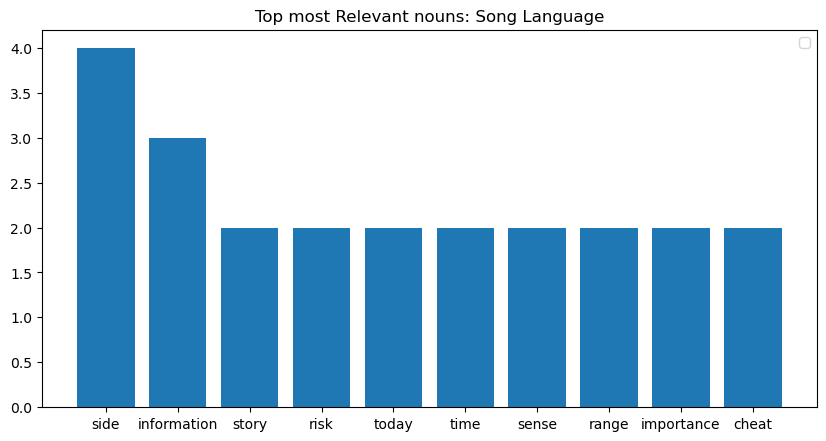

In [12]:
#ploting nouns used
labels = [word[0] for word in top_nouns]
values = [word[1] for word in top_nouns]

plt.figure(figsize=(10,5), dpi=100)
plt.title('Top most Relevant nouns: Song Language')
plt.bar(labels,values)
plt.legend('')
plt.savefig('Nouns')

plt.show()

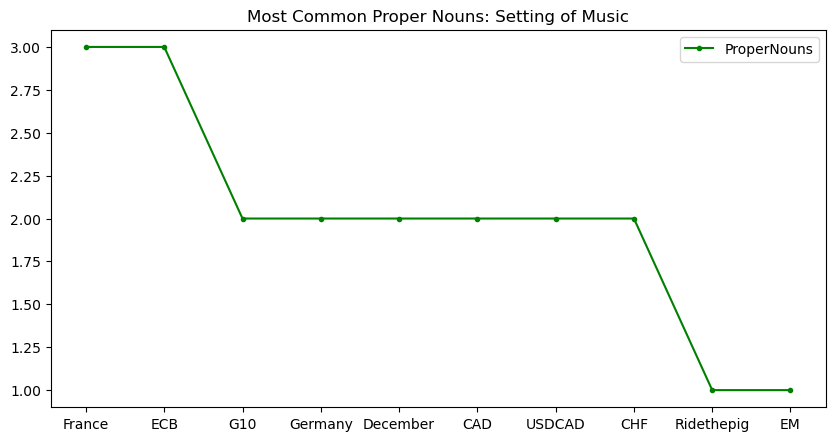

In [13]:
#ploting nouns used
x = [word[0] for word in top_pnouns]
y = [word[1] for word in top_pnouns]

plt.figure(figsize=(10,5), dpi=100)
plt.title('Most Common Proper Nouns: Setting of Music')
plt.plot(x,y,'g.-',label='ProperNouns')
plt.legend()

plt.savefig('properNouns')
plt.show()

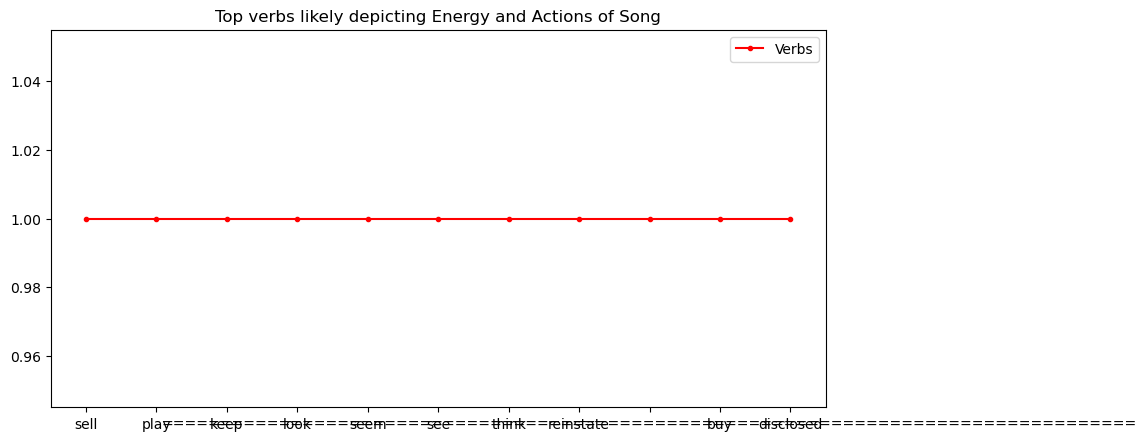

In [14]:
#ploting nouns used
x = [word[0] for word in top_verbs]
y = [word[1] for word in top_verbs]

plt.figure(figsize=(10,5), dpi=100)
plt.title('Top verbs likely depicting Energy and Actions of Song')
plt.plot(x,y,'r.-',label='Verbs')
plt.legend()
plt.savefig('verbs')

plt.show()

In [15]:
#putting the words in frequencies
frequency_table = {}
for word in data_words_filt:
    if(len(word)>1):
        if word not in frequency_table.keys():
            frequency_table[word] = 1
        else:
            frequency_table[word] +=1

max_freq = max(frequency_table.values())

for word in frequency_table.keys():
    frequency_table[word] = frequency_table[word]/max_freq

In [16]:
#Algorithm for scoring a sentence by its word
sentence_weight = dict()

for sentence in data_sent:
    sent_count = len(sentence)
    sent_minus_stops_count = 0;
    for word_weight in frequency_table:
        if word_weight in sentence.lower():
            sent_minus_stops_count = sent_minus_stops_count+1
            if sentence in sentence_weight:
                sentence_weight[sentence] = sentence_weight[sentence] + 1
            else:
                sentence_weight[sentence] = frequency_table[word_weight]
    #sentence_weight[sentence] = sentence_weight[sentence]

In [17]:
#GETTING THE DOCUMENT ABSTRACT... 
import heapq

summary_sentences = heapq.nlargest(7, sentence_weight, key=sentence_weight.get)
summary  =  ' '.join(summary_sentences[1:2])
print(summary)
print("\nLength of Summary ",len(summary))


Event Risk Today: 
 
 
The ECB on deck today and at a time when Lagarde ought to play the “leading” role, something similar to the pacemaker in the Tour de France, and not kick the can with PEPP while reading newspapers about what has happened from her home.

Length of Summary  258


In [18]:
#